In [2]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image
import pickle
import matplotlib.pyplot as plt

In [3]:
pickle_in = open("E:\/mean_img.pickle","rb")
mean_img = pickle.load(pickle_in)

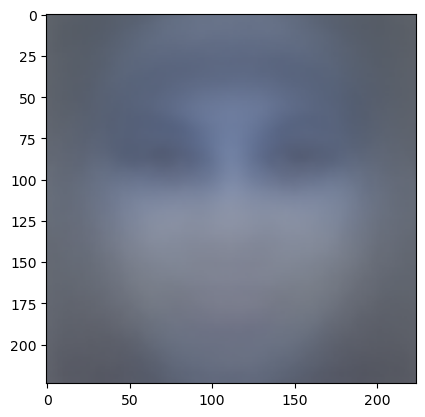

In [4]:
plt.imshow(mean_img.astype('uint8'))

In [17]:
# Load the trained model
model = load_model('E:\\modelmaskdetection.h5')
resize = 224

# Start capturing video from the laptop's camera
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()
    
    # Check if the frame was captured successfully
    if not ret:
        print("Failed to capture frame from camera.")
        break
    
    image = cv2.resize(frame, (resize, resize))
    image = image - mean_img  # Assuming 'mean_img' is defined
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # Predict using the model
    predictions = model.predict(image, verbose=1)
    #predictions = model.predict(image)[0]
    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_prob = predictions[0][predicted_class_index]  # Fix the indexing here
    # Debugging information for each frame
    print(f"Frame  - Raw Predictions:", predictions)
    print(f"Frame  - Proba Predictions:", predicted_class_prob)
    print(f"Frame  - Predicted Class Index:", predicted_class_index)
    # Display the prediction result
    if (predicted_class_index == 1):
        label = "With Mask"
        color = (0, 255, 0)
    elif (predicted_class_index == 2):
        label = "Without Mask"
        color = (0, 0, 255)
    else:
        threshold_for_incorrect = 0.5
        if predicted_class_prob >= threshold_for_incorrect:
            label = "Incorrectly Worn Mask"
            color = (255, 0, 0)
        else:
            label = "With Mask"
            color = (0, 255, 0)
    
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    
    # Display the frame
    cv2.imshow('Face Mask Detection', frame)
    
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 435ms/step
Frame  - Raw Predictions: [[0.00245406 0.04405157 0.95349437]]
Frame  - Proba Predictions: 0.95349437
Frame  - Predicted Class Index: 2
1/1 [==============================] - 0s 34ms/step
Frame  - Raw Predictions: [[0.00248322 0.01534674 0.98217   ]]
Frame  - Proba Predictions: 0.98217
Frame  - Predicted Class Index: 2
1/1 [==============================] - 0s 43ms/step
Frame  - Raw Predictions: [[0.00187142 0.01140356 0.986725  ]]
Frame  - Proba Predictions: 0.986725
Frame  - Predicted Class Index: 2
1/1 [==============================] - 0s 39ms/step
Frame  - Raw Predictions: [[0.00180007 0.0133635  0.9848364 ]]
Frame  - Proba Predictions: 0.9848364
Frame  - Predicted Class Index: 2
1/1 [==============================] - 0s 31ms/step
Frame  - Raw Predictions: [[0.00175341 0.01621508 0.98203146]]
Frame  - Proba Predictions: 0.98203146
Frame  - Predicted Class Index: 2
1/1 [==============================] - 0s 43ms/step
Frame  - Raw 